# Pixel size effects on spectral signatures - Pigmented vs Bleached CCA

## Objectives:
- Get mean Pigmented vs Bleached
- Mean of 2by2, 4by4?
- Show spatial scale plot

In [1]:
import os
import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Plot style

plt.rcParams['figure.dpi'] = 600

sns.set(rc={'figure.figsize':(13,8)})
sns.set_style('white')
sns.set_context("paper")
sns.set_palette('husl')
#plt.grid(axis='x', linestyle='--', linewidth=1)

%matplotlib inline

## Load data

In [3]:
# Get Sample names
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\HSI-ROI-Scales\Pigmented")
files = list(files_path.glob('*.txt'))
pigmented = files

files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\HSI-ROI-Scales\Bleached")
files = list(files_path.glob('*.txt'))
bleached = files

In [4]:
P_labels = [] # Pigmented samples
B_labels = [] # Bleached samples
columns = ['Wavelength','Min','Mean-Std','Mean','Mean+Std','Max']

for i, file in enumerate(pigmented):
    P_labels.append(pigmented[i].stem[:])
    
for i, file in enumerate(bleached):
    B_labels.append(bleached[i].stem[:])

In [5]:
# GN04 has up to 16x16 pixel size
print(B_labels, P_labels)

['CE02_B_2', 'CE02_B_4', 'CE02_B_8', 'CE03_B_16', 'CE03_B_2', 'CE03_B_4', 'CE03_B_8', 'CE04_B_16', 'CE04_B_2', 'CE04_B_4', 'CE04_B_8', 'CE05_B_16', 'CE05_B_2', 'CE05_B_4', 'CE05_B_8', 'GN02_B_16', 'GN02_B_2', 'GN02_B_4', 'GN02_B_8', 'GN03_B_16', 'GN03_B_2', 'GN03_B_4', 'GN03_B_8', 'GN04_B_16', 'GN04_B_2', 'GN04_B_4', 'GN04_B_8', 'GN07_B_16', 'GN07_B_2', 'GN07_B_4', 'GN07_B_8'] ['CE02_2', 'CE02_4', 'CE02_8', 'CE03_16', 'CE03_2', 'CE03_4', 'CE03_8', 'CE04_16', 'CE04_2', 'CE04_4', 'CE04_8', 'CE05_16', 'CE05_2', 'CE05_4', 'CE05_8', 'GN01_16', 'GN01_2', 'GN01_4', 'GN01_8', 'GN02_16', 'GN02_2', 'GN02_4', 'GN02_8', 'GN03_16', 'GN03_2', 'GN03_4', 'GN03_8', 'GN04_16', 'GN04_2', 'GN04_25', 'GN04_4', 'GN04_8', 'GN07_16', 'GN07_2', 'GN07_4', 'GN07_8']


## Prepare dataframes

In [6]:
spectra_p = [] # spectral signatures of pigmented samples
spectra_b = [] # spectral signatures of bleached samples

for i, file in enumerate(pigmented):
    df = pd.read_csv(pigmented[i], header=7, sep=' ', names=columns, index_col=0, skipinitialspace=True)
    spectra_p.append(df['Mean'])

pigmented_df = pd.concat(spectra_p, axis=1, ignore_index=True)
pigmented_df.columns = P_labels

for i, file in enumerate(bleached):
    df = pd.read_csv(bleached[i], header=7, sep=' ', names=columns, index_col=0, skipinitialspace=True)
    spectra_b.append(df['Mean'])

bleached_df = pd.concat(spectra_b, axis=1, ignore_index=True)
bleached_df.columns = B_labels

# Discard noisy bands. Keep 400 nm to 800 nm
pigmented_df = pigmented_df.loc['399':'800',:]
bleached_df = bleached_df.loc['399':'800',:]

# Acquire the x_scale right after cropping the dataframe.
wvl = pigmented_df.index

In [7]:
#pigmented_df.head()
bleached_df.head()

,CE02_B_2,CE02_B_4,CE02_B_8,CE03_B_16,CE03_B_2,CE03_B_4,CE03_B_8,CE04_B_16,CE04_B_2,CE04_B_4,...,GN03_B_4,GN03_B_8,GN04_B_16,GN04_B_2,GN04_B_4,GN04_B_8,GN07_B_16,GN07_B_2,GN07_B_4,GN07_B_8
Wavelength,,,,,,,,,,,,,,,,,,,,,
399.41,0.291475,0.294957,0.245652,0.295859,0.306397,0.315102,0.285693,0.202255,0.148225,0.192244,...,0.220347,0.213384,0.232518,0.222834,0.197716,0.268595,0.210104,0.106443,0.143251,0.204866
401.10,0.274765,0.277865,0.252404,0.296827,0.386388,0.306487,0.304698,0.182014,0.266178,0.199634,...,0.289314,0.224976,0.222143,0.225154,0.200349,0.223067,0.209830,0.180314,0.246620,0.239405
402.78,0.160796,0.225574,0.229766,0.276828,0.345482,0.324119,0.298794,0.177924,0.238897,0.210413,...,0.302986,0.231547,0.215252,0.334456,0.239127,0.210069,0.230987,0.251761,0.254288,0.266060
404.47,0.324662,0.306327,0.219795,0.273137,0.235223,0.351270,0.288048,0.191734,0.274576,0.199001,...,0.186703,0.187430,0.236006,0.304091,0.278601,0.231646,0.207260,0.240590,0.274353,0.249589
406.15,0.301173,0.212090,0.244539,0.290886,0.299422,0.294169,0.301720,0.180066,0.253896,0.181010,...,0.216468,0.186646,0.233226,0.152337,0.253677,0.263362,0.215073,0.199614,0.273813,0.245524


In [8]:
# Funny one here. Transpose to make Sample names as index, then loc that to same transpose index if str, then return the transpose of that.

df_B2 = bleached_df.T.loc[bleached_df.T.index.str.contains('_2')].T # Bleached at 2 by 2 px
df_B4 = bleached_df.T.loc[bleached_df.T.index.str.contains('_4')].T
df_B8 = bleached_df.T.loc[bleached_df.T.index.str.contains('_8')].T
df_B16 = bleached_df.T.loc[bleached_df.T.index.str.contains('_16')].T
 

In [9]:
# Now Triple transpose loc for pigmented
df_2 = pigmented_df.T.loc[pigmented_df.T.index.str.contains('_2')].T # Pigmented at 2 by 2 px
df_4 = pigmented_df.T.loc[pigmented_df.T.index.str.contains('_4')].T
df_8 = pigmented_df.T.loc[pigmented_df.T.index.str.contains('_8')].T
df_16 = pigmented_df.T.loc[pigmented_df.T.index.str.contains('_16')].T

## Plots

In [15]:
# Where to store figure
out_p = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Hyperspectral_Imaging"

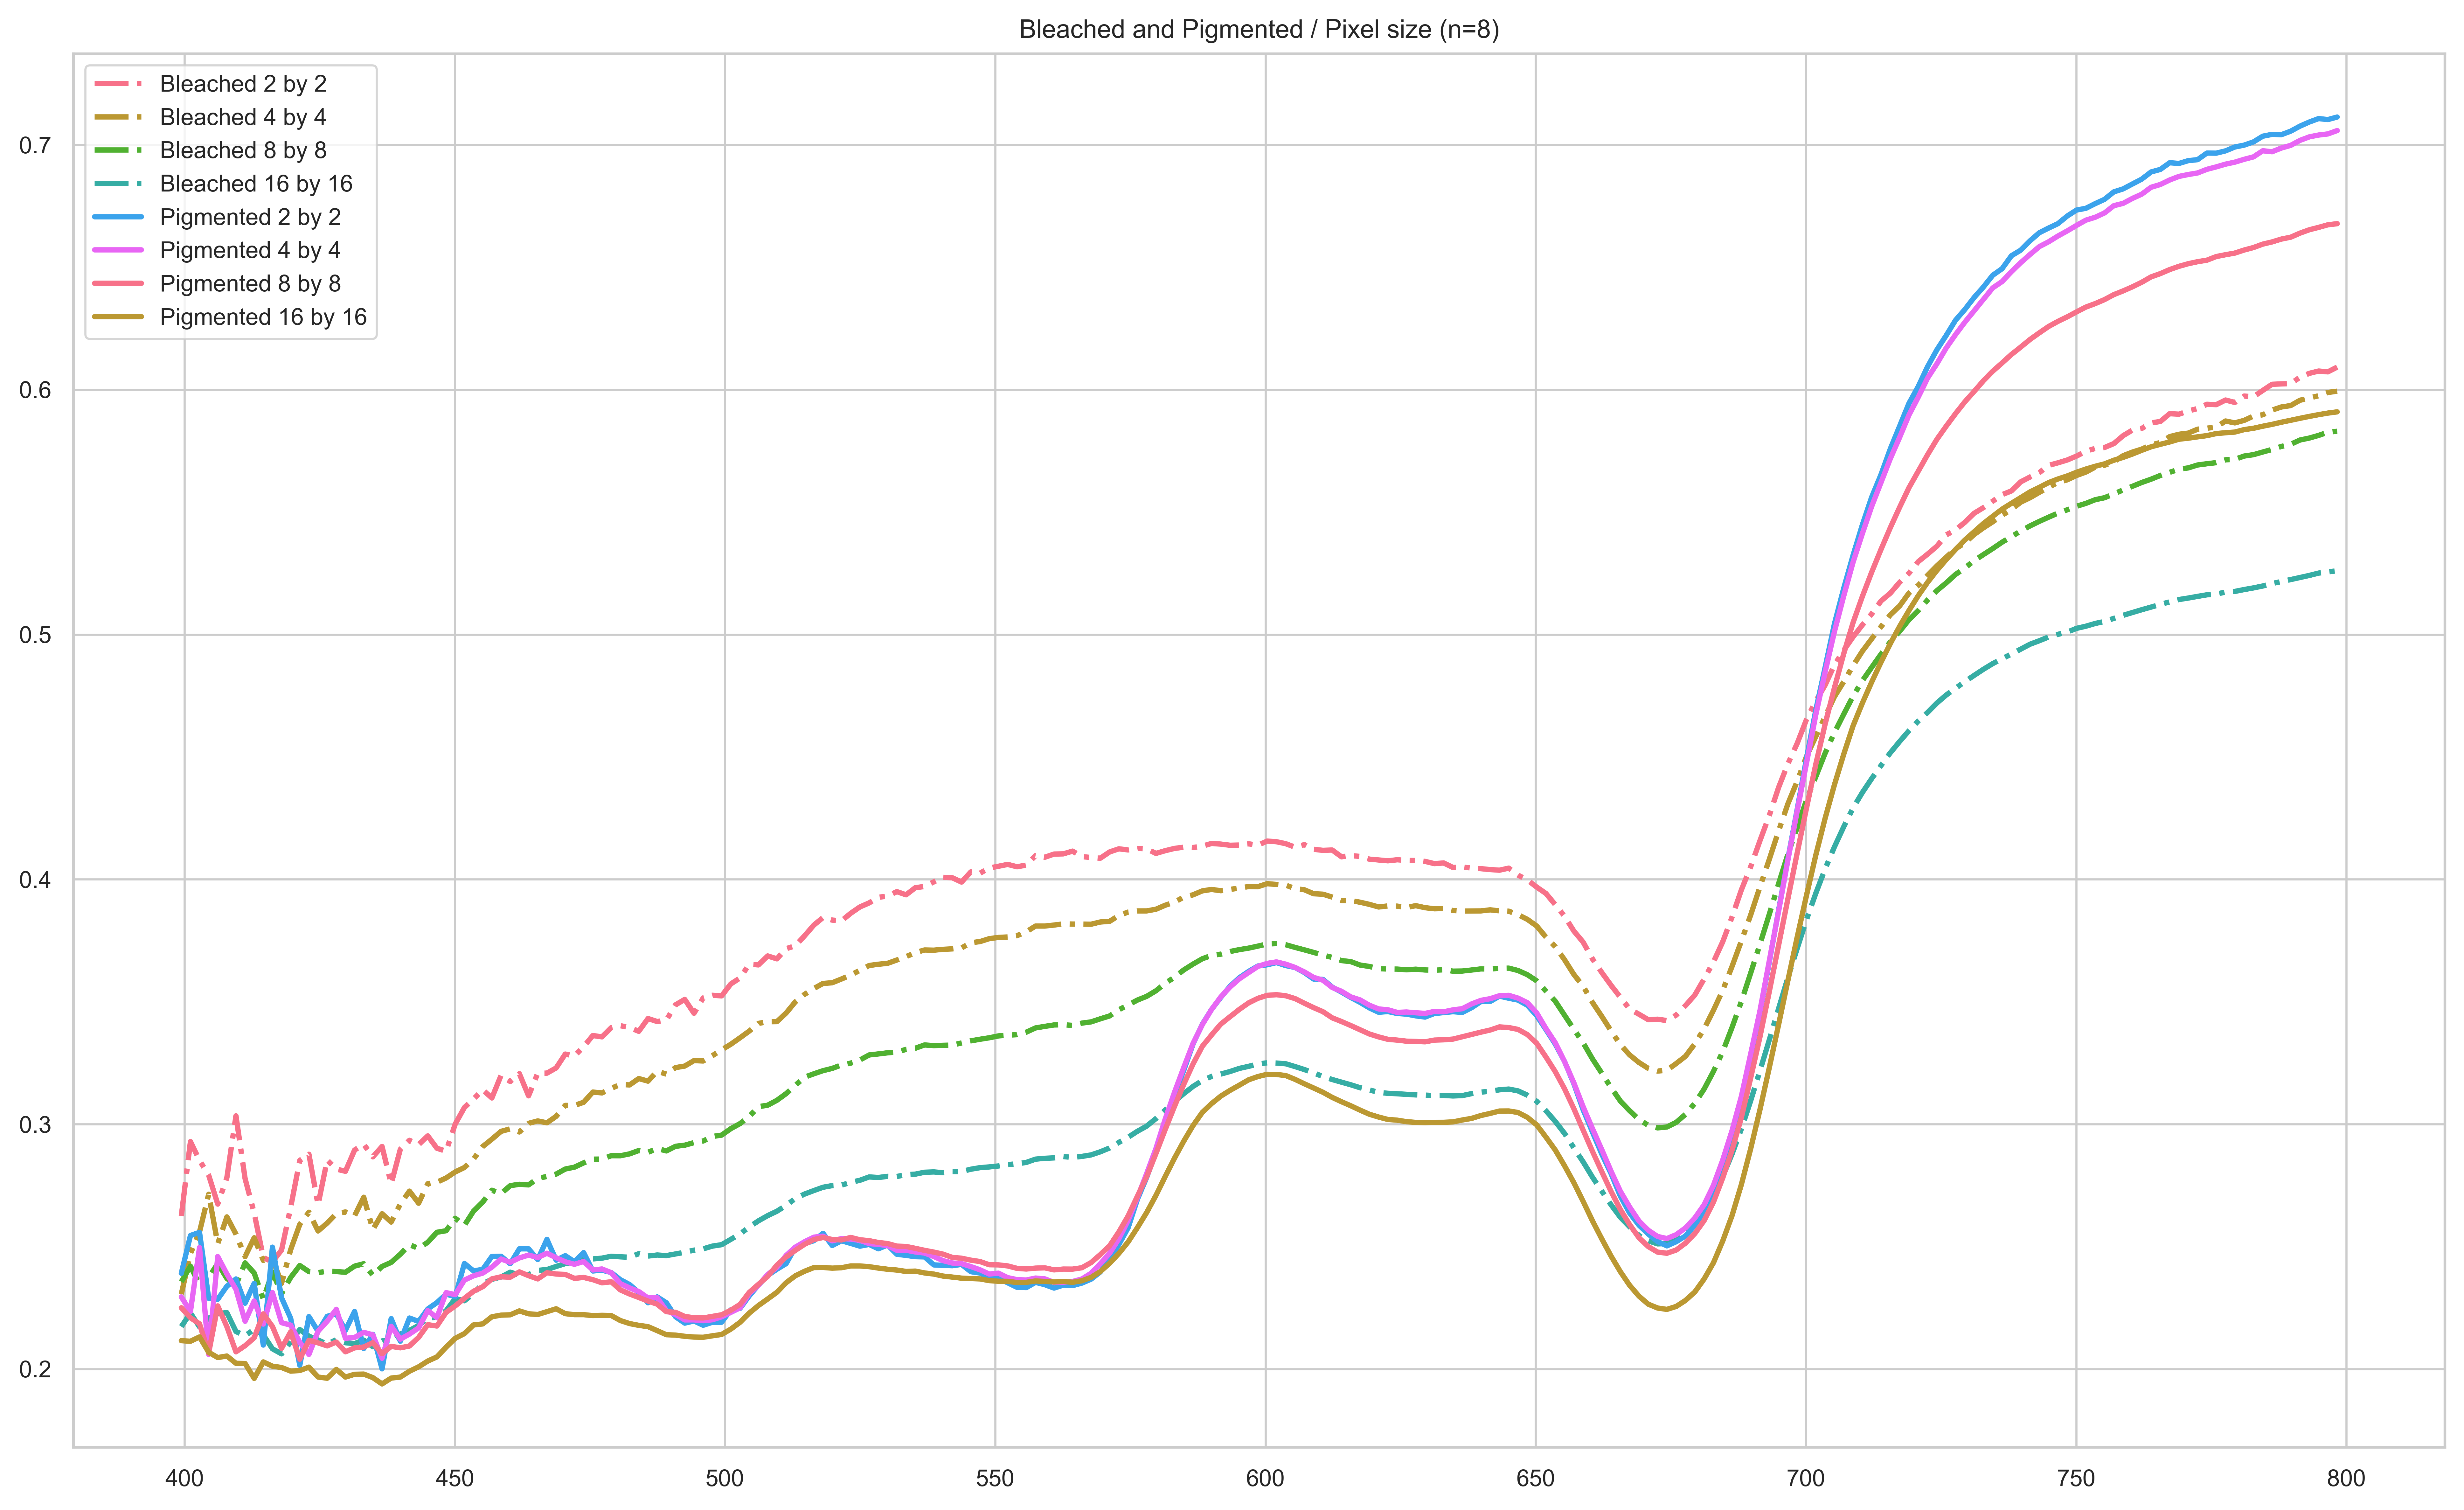

In [20]:
# Bleached

sns.set(rc={'figure.figsize':(13,8)})
sns.set_style('whitegrid')
sns.set_context("paper")
sns.set_palette('husl')

# plt.plot(bleached_df)
plt.plot(df_B2.mean(axis=1), label = 'Bleached 2 by 2', linestyle='-.', lw=2)
plt.plot(df_B4.mean(axis=1), label = 'Bleached 4 by 4', linestyle='-.', lw=2)
plt.plot(df_B8.mean(axis=1), label= 'Bleached 8 by 8', linestyle='-.', lw=2)
plt.plot(df_B16.mean(axis=1), label= 'Bleached 16 by 16', linestyle='-.', lw=2)

# Pigmented
plt.plot(df_2.mean(axis=1), label = 'Pigmented 2 by 2', linestyle='-', lw=2)
plt.plot(df_4.mean(axis=1), label = 'Pigmented 4 by 4', linestyle='-', lw=2)
plt.plot(df_8.mean(axis=1), label= 'Pigmented 8 by 8', linestyle='-', lw=2)
plt.plot(df_16.mean(axis=1), label= 'Pigmented 16 by 16', linestyle='-', lw=2)


plt.title('Bleached and Pigmented / Pixel size (n=8)')
plt.legend()
plt.tight_layout()
plt.savefig(out_p + '/pixel_size.png', dpi=600)

plt.show()

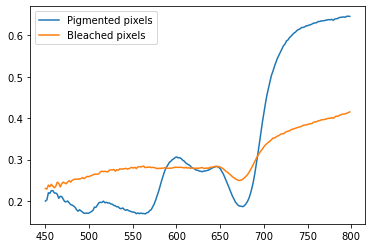

In [75]:
# One rock - 32 pixels
plt.plot(samples_df['32pixels'], label='Pigmented pixels')
plt.plot(samples_df['B_32pixels'], label='Bleached pixels')
#plt.title('Spectra comparison')
plt.legend()
#plt.savefig(str(files_path) + '/32pixels.png', dpi=600)
plt.show()